# Data Preprocessing 




## Importing the libraries

In [175]:
import random

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
import matplotlib
from sklearn.metrics import auc

random.seed(786)
import time
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, plot_confusion_matrix, plot_roc_curve,precision_recall_curve,plot_precision_recall_curve




## Importing the dataset







In [176]:
from scipy.io import arff

data = arff.loadarff('LargeKitchenAppliances_TRAIN.arff')
dataset = pd.DataFrame(data[0])


dataset

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,att11,att12,att13,att14,att15,att16,att17,att18,att19,att20,att21,att22,att23,att24,att25,att26,att27,att28,att29,att30,att31,att32,att33,att34,att35,att36,att37,att38,att39,att40,...,att682,att683,att684,att685,att686,att687,att688,att689,att690,att691,att692,att693,att694,att695,att696,att697,att698,att699,att700,att701,att702,att703,att704,att705,att706,att707,att708,att709,att710,att711,att712,att713,att714,att715,att716,att717,att718,att719,att720,target
0,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,...,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,b'1'
1,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,...,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,b'1'
2,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,...,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,b'1'
3,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,...,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,b'1'
4,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.14057

In [177]:
dataset['target'].unique()

array([b'1', b'2', b'3'], dtype=object)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [179]:
dataset.describe()

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,att11,att12,att13,att14,att15,att16,att17,att18,att19,att20,att21,att22,att23,att24,att25,att26,att27,att28,att29,att30,att31,att32,att33,att34,att35,att36,att37,att38,att39,att40,...,att681,att682,att683,att684,att685,att686,att687,att688,att689,att690,att691,att692,att693,att694,att695,att696,att697,att698,att699,att700,att701,att702,att703,att704,att705,att706,att707,att708,att709,att710,att711,att712,att713,att714,att715,att716,att717,att718,att719,att720
count,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,...,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000
mean,0.088484,0.017864,-0.026741,-0.031323,-0.038759,-0.006532,-0.001379,-0.018546,-0.030925,-0.082533,-0.054984,-0.089291,-0.077022,-0.088442,-0.105359,-0.030207,-0.075022,-0.083191,-0.091507,-0.103185,-0.069279,-0.081615,-0.080680,-0.084752,-0.119976,-0.128466,-0.101225,-0.088674,-0.078793,-0.110446,-0.101340,-0.105004,-0.123589,-0.125299,-0.134699,-0.133297,-0.138630,-0.135314,-0.134838,-0.172682,...,-0.022172,-0.013348,-0.025311,-0.025170,-0.055209,-0.070050,-0.097078,-0.090612,-0.071647,-0.048575,-0.015050,-0.018066,-0.017742,-0.068686,-0.065754,-0.055830,-0.061589,-0.076696,-0.083428,-0.112331,-0.106942,-0.108433,-0.121018,-0.114550,-0.155121,-0.130696,-0.155117,-0.155171,-0.125256,-0.098727,-0.072425,-0.076904,-0.070594,-0.073172,-0.084466,-0.043241,0.010751,-0.064955,-0.074110,-0.085435
std,1.790828,1.178260,0.938110,0.994872,1.028598,1.115328,1.051750,1.048959,1.019400,0.887769,0.969387,0.756822,0.832159,0.777194,0.701502,1.345180,0.840837,0.772357,0.786676,0.705338,0.835325,0.809685,0.786403,0.732449,0.578671,0.568966,0.662838,0.729613,0.754213,0.703551,0.695705,0.644071,0.612747,0.528609,0.463540,0.607980,0.621610,0.603310,0.605101,0.117208,...,0.888383,0.885785,0.865760,0.847020,0.711749,0.637284,0.580049,0.556916,0.640845,0.803914,0.898301,0.885267,0.897867,0.728228,0.718873,0.802111,0.816895,0.758411,0.719326,0.561101,0.631271,0.604087,0.576804,0.605209,0.384403,0.455227,0.276067,0.384386,0.482795,0.704004,0.850635,0.865203,0.865857,0.845686,0.819517,0.911641,1.636248,0.956432,0.922845,0.864145
min,-0.686373,-0.686373,-0.686373,-0.686373,-0.686373,-0.686373,-0.686373,-0.686373,-0.686373,-0.686373,-1.575090,-0.686373,-0.686373,-0.686373,-1.575090,-0.686373,-0.686373,-0.686373,-1.575090,-0.686373,-0.686373,-1.575090,-0.686373,-0.686373,-0.686373,-1.575090,-0.686373,-0.686373,-0.686373,-1.575090,-0.686373,-0.686373,-1.575090,-0.686373,-0.686373,-0.686373,-1.575090,-0.686373,-0.686373,-0.686373,...,-0.592658,-0.592658,-1.575090,-0.592658,-0.592658,-0.592658,-1.575090,-0.592658,-0.592658,-1.575090,-0.592658,-0.592658,-0.592658,-1.575090,-0.592658,-0.626405,-0.646395,-1.575090,-0.654390,-0.638399,-1.575090,-0.674380,-0.686373,-0.686373,-1.575090,-0.686373,-0.686373,-1.575090,-0.686373,-0.686373,-0.686373,-1.575090,-0.686373,-0.686373,-1.575090,-0.686373,-0.686373,-0.686373,-1.575090,-0.686373
25%,-0.204997,-0.204997,-0.204997,-0.204566,-0.204997,-0.204997,-0.205783,-0.204997,-0.205783,-0.206735,-0.206735,-0.205783,-0.204566,-0.204997,-0.206735,-0.204997,-0.204997,-0.204997,-0.205783,-0.204997,-0.204566,-0.205783,-0.206735,-0.205783,-0.20673

Filling missing values of Target column MOIC

In [180]:
# check missing value in dataset
missing = dataset.isna().sum().sort_values(ascending = False)
percent_missing = ((missing / dataset.isnull().count()) * 100).sort_values(ascending = False)
missing_df = pd.concat([missing,percent_missing], axis = 1, keys = ['Total', 'Percent'],sort = False)
missing_df[missing_df['Total'] >= 1]

,Total,Percent


In [181]:
dataset['target'] = dataset['target'].apply(lambda x: 0 if x == b'1' else ( 1 if x== b'2' else 2))


In [182]:
dataset

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,att11,att12,att13,att14,att15,att16,att17,att18,att19,att20,att21,att22,att23,att24,att25,att26,att27,att28,att29,att30,att31,att32,att33,att34,att35,att36,att37,att38,att39,att40,...,att682,att683,att684,att685,att686,att687,att688,att689,att690,att691,att692,att693,att694,att695,att696,att697,att698,att699,att700,att701,att702,att703,att704,att705,att706,att707,att708,att709,att710,att711,att712,att713,att714,att715,att716,att717,att718,att719,att720,target
0,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,...,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,0
1,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,...,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,-0.155256,0
2,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,...,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,-0.100082,0
3,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,...,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,-0.140671,0
4,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,-0.140576,

In [183]:
# checking if dataset is balanced or imbalanced
dataset['target'].value_counts(normalize=True)

2    0.333333
1    0.333333
0    0.333333
Name: target, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


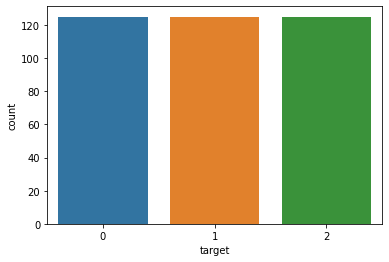

In [184]:
sn.countplot(dataset['target'])


KeyboardInterrupt: ignored

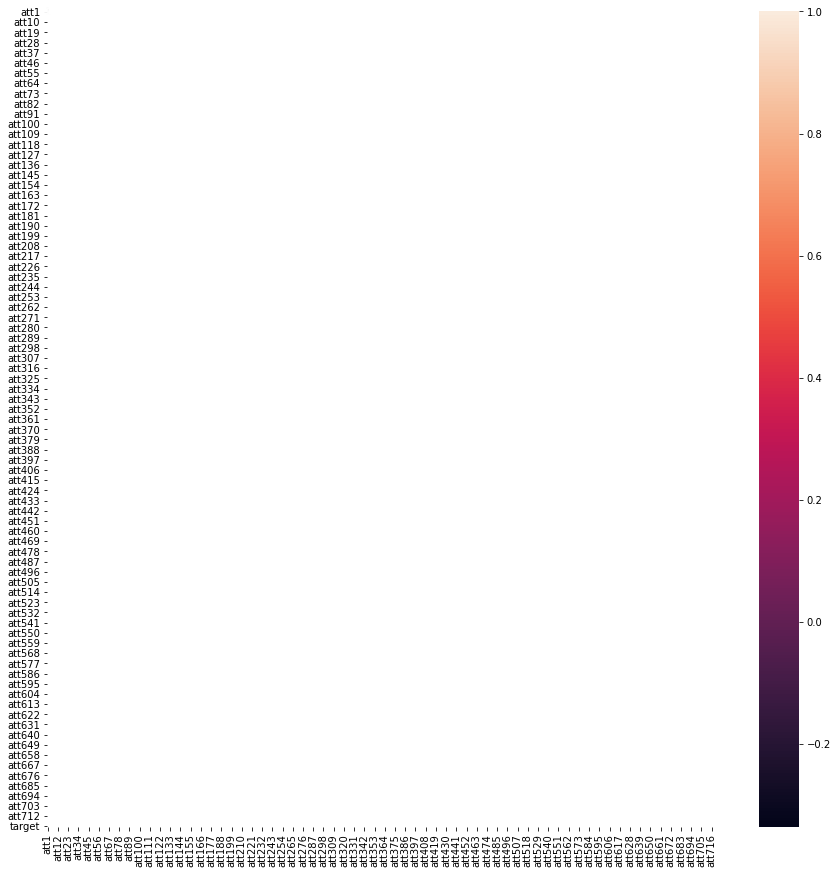

In [185]:
# Correlation Matrix
corrMatrix= dataset.corr()

fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches

sn.heatmap(corrMatrix, annot=True,linewidth=0.8)
plt.show()

In [311]:
# Drop Column with perfect correlation
dataset.drop(columns={"icu"}, axis=1, inplace=True)

In [186]:
X = dataset.loc[:,dataset.columns!='target']
Y = dataset['target']


In [187]:
from sklearn.preprocessing import MinMaxScaler


scaling = MinMaxScaler(feature_range=(-1, 1)).fit(X)
X = scaling.transform(X)

## Splitting the dataset into the Training set and Test set

In [188]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 786,stratify=Y)

### Building Models

Defining Function for Model Performance evaluation

In [189]:
def eval_result(model_name,X,y,y_pred):
    from matplotlib import pyplot as plt

    train_accuracy = accuracy_score(y, y_pred)
    print(f'accuracy is {train_accuracy}')
    
    #plot_roc_curve(model_name, X, y)

    #plot_precision_recall_curve(model_name,X,y)
    print(classification_report(y,y_pred,digits=5))
    plot_confusion_matrix(model_name, X, y,cmap=plt.cm.pink, normalize = 'all')


In [190]:
# user defined function to calculate model training time

def run_model(model,X_train,y_train,verbose=True):
    t0=time.time()
    if verbose== False:
        model.fit(X_train,y_train.ravel(),verbose=0)
    else :
        model.fit(X_train,y_train.ravel())
    
    time_taken= time.time()- t0

    print(f'Time taken: {time_taken}')

### XGBOOST 

In [191]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
 
#xgb = XGBClassifier(objective='multi:softmax',num_class=3)

xgb = XGBClassifier(random_state=0,objective='multi:softmax')

params = {
    "learning_rate"   : [0.05, 0.10, 0.15, 0.20, 0.30],
    "max_depth"       : [3, 4, 5, 6, 8, 10, 12, 15],
    "min_child_weight": [1, 3, 5, 7],
    "gamma"           : [0.0, 0.1, 0.2, 0.3, 0.4],
    "colsample_bytree": [0.3, 0.4, 0.5, 0.7]
}


clf = RandomizedSearchCV(xgb ,
                         param_distributions = params, 
                         cv=5,
                         scoring="accuracy",
                         n_jobs= 10,
                         verbose = 1)


run_model(clf,X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:   54.2s
[Parallel(n_jobs=10)]: Done  50 out of  50 | elapsed:  1.3min finished


Time taken: 80.00426769256592


In [162]:
print(clf.best_estimator_)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.0,
              learning_rate=0.05, max_delta_step=0, max_depth=15,
              min_child_weight=7, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


In [194]:
y_predtest= clf.predict(X_test)

y_predtrain = clf.predict(X_train)

accuracy is 0.9847328244274809
              precision    recall  f1-score   support

           0    1.00000   0.98864   0.99429        88
           1    0.95604   1.00000   0.97753        87
           2    1.00000   0.96552   0.98246        87

    accuracy                        0.98473       262
   macro avg    0.98535   0.98472   0.98476       262
weighted avg    0.98540   0.98473   0.98479       262



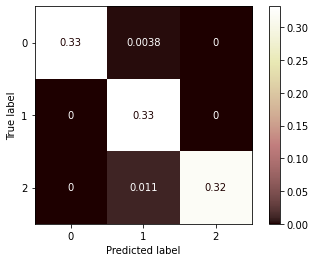

In [195]:
eval_result(clf,X_train,y_train,y_predtrain)

accuracy is 0.6460176991150443
              precision    recall  f1-score   support

           0    0.60526   0.62162   0.61333        37
           1    0.74286   0.68421   0.71233        38
           2    0.60000   0.63158   0.61538        38

    accuracy                        0.64602       113
   macro avg    0.64937   0.64580   0.64702       113
weighted avg    0.64976   0.64602   0.64731       113



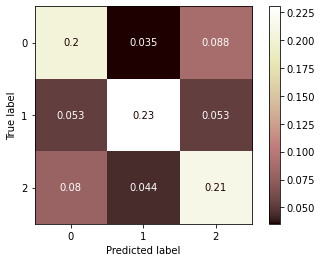

In [196]:
eval_result(clf,X_test,y_test,y_predtest)

In [199]:
# checking if distribution in target variable in train and test data is identical

#https://towardsdatascience.com/why-you-may-be-getting-low-test-accuracy-try-this-simpstatistical-tests-30585b7ee4fa

from scipy import stats
stats.ks_2samp(y_train,y_test)


Ks_2sampResult(statistic=0.008444234276835777, pvalue=1.0)